In [568]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [569]:
def write_percentiles(filename, c):
	with open(filename, 'w') as f:
		f.write('values; percentile\n')
		for x, y in zip(c.xs, c.ps):
			f.write('%.2f, %.2f\n'%(x, y))

In [570]:
def print_percentiles(c, name):
	print('-----------------------------\n')
	print('percentile values distribution for %s\n' % name)

	print('50th Percentile:%f\n' % c.Percentile(50))
	print('90th Percentile:%f\n' % c.Percentile(90))
	print('99th Percentile:%f\n' % c.Percentile(99))
	print('25th Percentile:%f\n' % c.Percentile(25))
	print('75th Percentile:%f\n' % c.Percentile(75))
	print('20th Percentile:%f\n' % c.Percentile(50))
	print('40th Percentile:%f\n' % c.Percentile(90))
	print('60th Percentile:%f\n' % c.Percentile(99))
	print('80th Percentile:%f\n' % c.Percentile(25))

	print('-----------------------------\n')

In [571]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [572]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [573]:
quic_data = "./data2020/output_quic.csv"

In [574]:
tcol_names = ['TimeOfMeasurement', 'Url', 'Path', 'Ip', 'Port', 'DNSTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'Protocol']
as_names = ['Url', 'Ip', 'ASNo','ASName','Lat','Lon'] 

In [575]:
t = pd.read_csv(quic_data,';', names=tcol_names, header=None)

In [576]:
t = t.dropna()

In [577]:
asndata = "./data/pi-1/quic_perf/asinfo.csv"

In [578]:
asn = pd.read_csv(asndata, ',', names=as_names, header=None)
asn

,Url,Ip,ASNo,ASName,Lat,Lon
0,www.google.com,172.217.19.68,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,www.youtube.com,172.217.22.78,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,www.google.co.in,216.58.213.227,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
3,www.blogspot.com,172.217.18.9,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
4,www.google.co.jp,216.58.210.3,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
...,...,...,...,...,...,...
7428,www.holidaysequences.com,35.190.16.47,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
7429,www.nickzammeti.com,130.211.40.170,15169.0,GOOGLE - Google LLC,4.35,50.8500
7430,www.redlink-network.org,35.190.35.16,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
7431,www.reefh2o.com,35.190.16.47,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [579]:
pd.set_option('display.max_rows', 500)
asn.groupby(['ASNo', 'ASName']).size().sort_values(ascending=False)


ASNo      ASName                                                                              
15169.0   GOOGLE - Google LLC                                                                     5040
15133.0   EDGECAST - MCI Communications Services                                                   557
7506.0    INTERQ GMO Internet                                                                      148
24940.0   HETZNER-AS - Hetzner Online GmbH                                                         126
16276.0   OVH - OVH SAS                                                                            102
55293.0   A2HOSTING - A2 Hosting                                                                    94
13335.0   CLOUDFLARENET - Cloudflare                                                                70
35415.0   WEBZILLA - Webzilla B.V.                                                                  60
47302.0   CYON - cyon GmbH                                                       

In [580]:
asn.count()

Url       7433
Ip        7424
ASNo      7424
ASName    7424
Lat       7424
Lon       7424
dtype: int64

In [581]:
asn.head()

,Url,Ip,ASNo,ASName,Lat,Lon
0,www.google.com,172.217.19.68,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,www.youtube.com,172.217.22.78,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,www.google.co.in,216.58.213.227,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
3,www.blogspot.com,172.217.18.9,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
4,www.google.co.jp,216.58.210.3,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [582]:
t = t.join(asn.set_index('Url'), on='Url', rsuffix='_right')

In [583]:
t = t.drop('Ip_right', axis=1)

In [584]:
t.count()

TimeOfMeasurement              5411215
Url                            5411215
Path                           5411215
Ip                             5411215
Port                           5411215
DNSTime                        5411215
ConnectionEstablishmentTime    5411215
TTFB                           5411215
TotalDownloadTime              5411215
HttpResponse                   5411215
Protocol                       5411215
ASNo                           4274615
ASName                         4274615
Lat                            4274615
Lon                            4274615
dtype: int64

In [585]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
0,1587124802,www.0dayrox2.blogspot.com,/,216.58.207.33,443,62.308,44.542,260.441,350.790,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,1587124802,www.0dayrox2.blogspot.com,/,216.58.207.33,443,0.503,36.357,238.053,332.277,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,1587124802,www.0dayrox2.blogspot.com,/,216.58.207.33,443,0.689,36.670,234.652,387.210,404.0,Q050,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
4,1587124803,www.0dayrox2.blogspot.com,/,2a00:1450:4001:81b::2001,443,18.795,35.975,252.821,403.325,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
5,1587124803,www.0dayrox2.blogspot.com,/,2a00:1450:4001:81b::2001,443,0.545,35.162,237.424,599.720,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [586]:
def timestamp2human(timestamp):
    return datetime.datetime.fromtimestamp(int(timestamp)).strftime('%c')

In [587]:
#t['TimeOfMeasurement'] = t['TimeOfMeasurement'].apply(timestamp2human)

In [588]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
0,1587124802,www.0dayrox2.blogspot.com,/,216.58.207.33,443,62.308,44.542,260.441,350.790,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,1587124802,www.0dayrox2.blogspot.com,/,216.58.207.33,443,0.503,36.357,238.053,332.277,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,1587124802,www.0dayrox2.blogspot.com,/,216.58.207.33,443,0.689,36.670,234.652,387.210,404.0,Q050,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
4,1587124803,www.0dayrox2.blogspot.com,/,2a00:1450:4001:81b::2001,443,18.795,35.975,252.821,403.325,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
5,1587124803,www.0dayrox2.blogspot.com,/,2a00:1450:4001:81b::2001,443,0.545,35.162,237.424,599.720,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [589]:
t.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
8660225,1589112032,www.sonidosminimos.blogspot.com,/,172.217.18.97,443,19.496,34.700,212.051,212.151,301.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
8660226,1589112032,www.sonidosminimos.blogspot.com,/,172.217.18.97,443,1.736,34.586,194.323,194.377,301.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
8660227,1589112033,www.sonidosminimos.blogspot.com,/,172.217.18.97,443,4.236,34.829,201.173,201.231,301.0,Q050,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
8660229,1589112033,www.sonidosminimos.blogspot.com,/,2a00:1450:4001:824::2001,443,1.817,36.797,207.400,207.467,301.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
8660231,1589112033,www.sonidosminimos.blogspot.com,/,2a00:1450:4001:824::2001,443,0.819,36.756,668.709,668.802,301.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [590]:
def filter_by_ip(df, column):
  """reads a DataFrame, calls fbi.filter_v{4,6} to get DataFrames with rows
     containing only v4, v6 endpoints. Returns the two DataFrame as a tuple"""

  dfv6 = fbi.filter_v6(df, column)
  dfv4 = fbi.filter_v4(df, column)
  return dfv4, dfv6

In [591]:
#quic4, quic6 = filter_by_ip(t, column = 'Ip')
quic4 = t[t['Ip'].str.contains("\.")]
quic6 = t[t['Ip'].str.contains("\:")]

In [592]:
#quic4 = quic4[quic4['HttpResponse'] == 200.0]
#quic6 = quic6[quic6['HttpResponse'] == 200.0]

In [593]:
quic4.count()

TimeOfMeasurement              3096593
Url                            3096593
Path                           3096593
Ip                             3096593
Port                           3096593
DNSTime                        3096593
ConnectionEstablishmentTime    3096593
TTFB                           3096593
TotalDownloadTime              3096593
HttpResponse                   3096593
Protocol                       3096593
ASNo                           2404344
ASName                         2404344
Lat                            2404344
Lon                            2404344
dtype: int64

In [594]:
quic4.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
0,1587124802,www.0dayrox2.blogspot.com,/,216.58.207.33,443,62.308,44.542,260.441,350.790,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
1,1587124802,www.0dayrox2.blogspot.com,/,216.58.207.33,443,0.503,36.357,238.053,332.277,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
2,1587124802,www.0dayrox2.blogspot.com,/,216.58.207.33,443,0.689,36.670,234.652,387.210,404.0,Q050,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
8,1587124804,www.0dayrox.blogspot.com,/,216.58.207.33,443,29.468,34.932,246.995,346.056,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
9,1587124804,www.0dayrox.blogspot.com,/,216.58.207.33,443,2.691,35.009,237.084,286.407,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [595]:
quic6.count()

TimeOfMeasurement              2314621
Url                            2314621
Path                           2314621
Ip                             2314621
Port                           2314621
DNSTime                        2314621
ConnectionEstablishmentTime    2314621
TTFB                           2314621
TotalDownloadTime              2314621
HttpResponse                   2314621
Protocol                       2314621
ASNo                           1870271
ASName                         1870271
Lat                            1870271
Lon                            1870271
dtype: int64

In [596]:
quic6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,ASNo,ASName,Lat,Lon
4,1587124803,www.0dayrox2.blogspot.com,/,2a00:1450:4001:81b::2001,443,18.795,35.975,252.821,403.325,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
5,1587124803,www.0dayrox2.blogspot.com,/,2a00:1450:4001:81b::2001,443,0.545,35.162,237.424,599.720,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
6,1587124804,www.0dayrox2.blogspot.com,/,2a00:1450:4001:81b::2001,443,0.550,36.134,269.986,420.088,404.0,Q050,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
12,1587124805,www.0dayrox.blogspot.com,/,2a00:1450:4001:81b::2001,443,0.634,35.409,245.062,619.198,404.0,Q043,15169.0,GOOGLE - Google LLC,-122.0574,37.4192
13,1587124806,www.0dayrox.blogspot.com,/,2a00:1450:4001:81b::2001,443,0.493,34.702,287.929,348.535,404.0,Q046,15169.0,GOOGLE - Google LLC,-122.0574,37.4192


In [597]:
t.groupby(['ASNo', 'ASName']).size().sort_values(ascending=False)

ASNo      ASName                                                                      
15169.0   GOOGLE - Google LLC                                                             3736839
15133.0   EDGECAST - MCI Communications Services                                           237488
203226.0  IHCRU - Internet-Hosting Ltd                                                      30106
35415.0   WEBZILLA - Webzilla B.V.                                                          21513
55293.0   A2HOSTING - A2 Hosting                                                            19593
16276.0   OVH - OVH SAS                                                                     18109
32475.0   SINGLEHOP-LLC - SingleHop LLC                                                     17700
7506.0    INTERQ GMO Internet                                                               17501
7979.0    SERVERS - Servers.com                                                             17327
205275.0  ROMARG - ROMARG SRL  

In [598]:
t.groupby(['ASNo', 'ASName']).size().sort_values(ascending=False)

ASNo      ASName                                                                      
15169.0   GOOGLE - Google LLC                                                             3736839
15133.0   EDGECAST - MCI Communications Services                                           237488
203226.0  IHCRU - Internet-Hosting Ltd                                                      30106
35415.0   WEBZILLA - Webzilla B.V.                                                          21513
55293.0   A2HOSTING - A2 Hosting                                                            19593
16276.0   OVH - OVH SAS                                                                     18109
32475.0   SINGLEHOP-LLC - SingleHop LLC                                                     17700
7506.0    INTERQ GMO Internet                                                               17501
7979.0    SERVERS - Servers.com                                                             17327
205275.0  ROMARG - ROMARG SRL  

In [599]:
quic15169 = quic4.loc[t['ASNo'] == 15169]
quic15133 = quic4.loc[t['ASNo'] == 15133]
quic55293= quic4.loc[t['ASNo'] == 55293]
quic35415 = quic4.loc[t['ASNo'] == 35415]
quic203226 = quic4.loc[t['ASNo'] == 203226]

In [600]:
quic15169.count()

TimeOfMeasurement              1885011
Url                            1885011
Path                           1885011
Ip                             1885011
Port                           1885011
DNSTime                        1885011
ConnectionEstablishmentTime    1885011
TTFB                           1885011
TotalDownloadTime              1885011
HttpResponse                   1885011
Protocol                       1885011
ASNo                           1885011
ASName                         1885011
Lat                            1885011
Lon                            1885011
dtype: int64

In [601]:
quic15133.count()

TimeOfMeasurement              237486
Url                            237486
Path                           237486
Ip                             237486
Port                           237486
DNSTime                        237486
ConnectionEstablishmentTime    237486
TTFB                           237486
TotalDownloadTime              237486
HttpResponse                   237486
Protocol                       237486
ASNo                           237486
ASName                         237486
Lat                            237486
Lon                            237486
dtype: int64

In [602]:
quic15133.count()

TimeOfMeasurement              237486
Url                            237486
Path                           237486
Ip                             237486
Port                           237486
DNSTime                        237486
ConnectionEstablishmentTime    237486
TTFB                           237486
TotalDownloadTime              237486
HttpResponse                   237486
Protocol                       237486
ASNo                           237486
ASName                         237486
Lat                            237486
Lon                            237486
dtype: int64

In [603]:
quic55293.count()

TimeOfMeasurement              19372
Url                            19372
Path                           19372
Ip                             19372
Port                           19372
DNSTime                        19372
ConnectionEstablishmentTime    19372
TTFB                           19372
TotalDownloadTime              19372
HttpResponse                   19372
Protocol                       19372
ASNo                           19372
ASName                         19372
Lat                            19372
Lon                            19372
dtype: int64

In [604]:
quic35415.count()

TimeOfMeasurement              21513
Url                            21513
Path                           21513
Ip                             21513
Port                           21513
DNSTime                        21513
ConnectionEstablishmentTime    21513
TTFB                           21513
TotalDownloadTime              21513
HttpResponse                   21513
Protocol                       21513
ASNo                           21513
ASName                         21513
Lat                            21513
Lon                            21513
dtype: int64

In [605]:
quic15169_6 = quic6.loc[t['ASNo'] == 15169]
quic15133_6 = quic6.loc[t['ASNo'] == 15133]
quic55293_6 = quic6.loc[t['ASNo'] == 55293]
quic35415_6 = quic6.loc[t['ASNo'] == 35415]
quic203226_6 = quic6.loc[t['ASNo'] == 203226]

In [606]:
quic15169_6.count()

TimeOfMeasurement              1851828
Url                            1851828
Path                           1851828
Ip                             1851828
Port                           1851828
DNSTime                        1851828
ConnectionEstablishmentTime    1851828
TTFB                           1851828
TotalDownloadTime              1851828
HttpResponse                   1851828
Protocol                       1851828
ASNo                           1851828
ASName                         1851828
Lat                            1851828
Lon                            1851828
dtype: int64

In [607]:
quic15133.count()

TimeOfMeasurement              237486
Url                            237486
Path                           237486
Ip                             237486
Port                           237486
DNSTime                        237486
ConnectionEstablishmentTime    237486
TTFB                           237486
TotalDownloadTime              237486
HttpResponse                   237486
Protocol                       237486
ASNo                           237486
ASName                         237486
Lat                            237486
Lon                            237486
dtype: int64

In [608]:
x = Cdf.MakeCdfFromList(quic15169['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic15133['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic55293['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(quic35415['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic203226['ConnectionEstablishmentTime'].values)

In [609]:
print_percentiles(x1, 'quic15133')
print_percentiles(x3, 'quic55293')
print_percentiles(x4, 'quic35415')
print_percentiles(x5, 'quic203226')
print_percentiles(x, 'quic15169')

-----------------------------

percentile values distribution for quic15133

50th Percentile:23.187000

90th Percentile:26.358000

99th Percentile:38.415000

25th Percentile:22.437000

75th Percentile:24.448000

20th Percentile:23.187000

40th Percentile:26.358000

60th Percentile:38.415000

80th Percentile:22.437000

-----------------------------

-----------------------------

percentile values distribution for quic55293

50th Percentile:236.165000

90th Percentile:309.710000

99th Percentile:554.981000

25th Percentile:235.080000

75th Percentile:238.755000

20th Percentile:236.165000

40th Percentile:309.710000

60th Percentile:554.981000

80th Percentile:235.080000

-----------------------------

-----------------------------

percentile values distribution for quic35415

50th Percentile:64.338000

90th Percentile:80.798000

99th Percentile:287.457000

25th Percentile:57.340000

75th Percentile:72.118000

20th Percentile:64.338000

40th Percentile:80.798000

60th Percentile:287.45

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


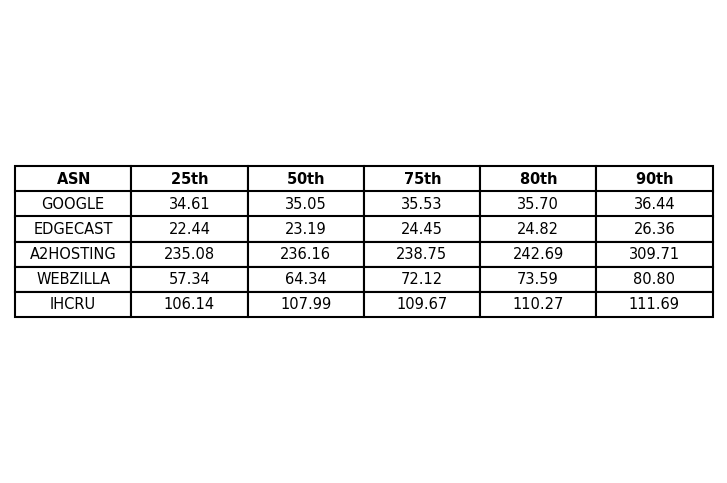

In [610]:
data = {'$\\bf{ASN}$': ['GOOGLE', 'EDGECAST', 'A2HOSTING', 'WEBZILLA', 'IHCRU'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x4.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x4.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x4.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x4.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x4.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/handshake_times_IPv4_asno_percentile.png', format='png', bbox_inches='tight')


In [611]:
write_percentiles('quic15133.csv', x1)
write_percentiles('quic55293.csv', x3)
write_percentiles('quic35415.csv', x4)
write_percentiles('quic203226.csv', x5)
write_percentiles('quic15169.csv', x)

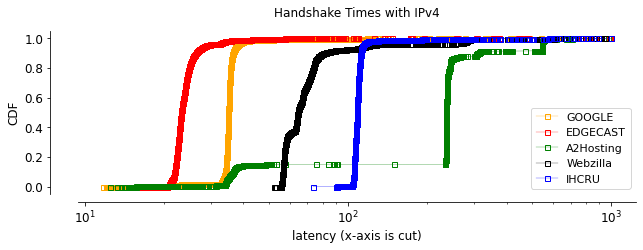

In [612]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15169
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#15133
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#55293
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#35415
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')
#203226
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
#ax.set_ylim([0,1.05])
#ax.set_xlim([0.2,8000])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['GOOGLE', 'EDGECAST', 'A2Hosting', 'Webzilla', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/handshake_times_IPv4_asno.png', format='png', bbox_inches='tight')


In [613]:
x = Cdf.MakeCdfFromList(quic15169_6['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic15133_6['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic55293_6['ConnectionEstablishmentTime'].values)
#x4 = Cdf.MakeCdfFromList(quic35415_6['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic203226_6['ConnectionEstablishmentTime'].values)

In [614]:
print_percentiles(x1, 'quic15133_6')
print_percentiles(x3, 'quic55293_6')
#print_percentiles(x4, 'quic35415_6')
print_percentiles(x5, 'quic203226_^')
print_percentiles(x, 'quic15169_6')

-----------------------------

percentile values distribution for quic15133_6

50th Percentile:41.783000

90th Percentile:46.750000

99th Percentile:46.750000

25th Percentile:41.783000

75th Percentile:46.750000

20th Percentile:41.783000

40th Percentile:46.750000

60th Percentile:46.750000

80th Percentile:41.783000

-----------------------------

-----------------------------

percentile values distribution for quic55293_6

50th Percentile:17.818000

90th Percentile:24.150000

99th Percentile:54.782000

25th Percentile:15.877000

75th Percentile:20.590000

20th Percentile:17.818000

40th Percentile:24.150000

60th Percentile:54.782000

80th Percentile:15.877000

-----------------------------

-----------------------------

percentile values distribution for quic203226_^

50th Percentile:94.567000

90th Percentile:96.071000

99th Percentile:106.941000

25th Percentile:92.936000

75th Percentile:95.454000

20th Percentile:94.567000

40th Percentile:96.071000

60th Percentile:106.9410

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


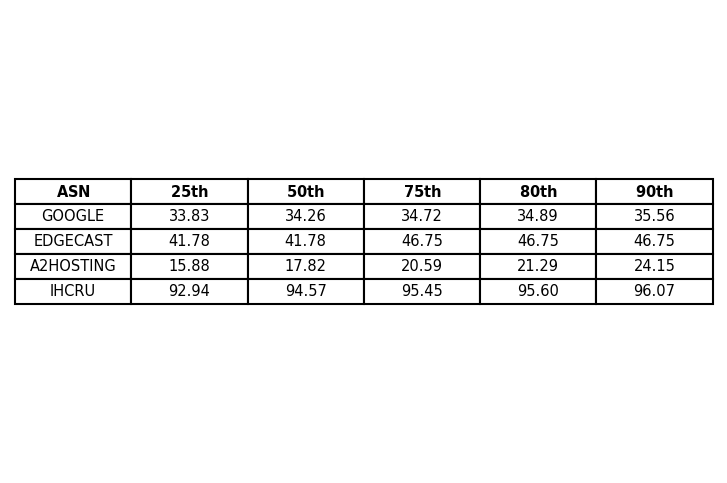

In [615]:
data = {'$\\bf{ASN}$': ['GOOGLE', 'EDGECAST', 'A2HOSTING', 'IHCRU'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/handshake_times_IPv6_asno_percentile.png', format='png', bbox_inches='tight')


In [616]:
write_percentiles('quic15133_6.csv', x1)
write_percentiles('quic55293_6.csv', x3)
write_percentiles('quic35415_6.csv', x4)
write_percentiles('quic203226_6.csv', x5)
write_percentiles('quic15169_6.csv', x)

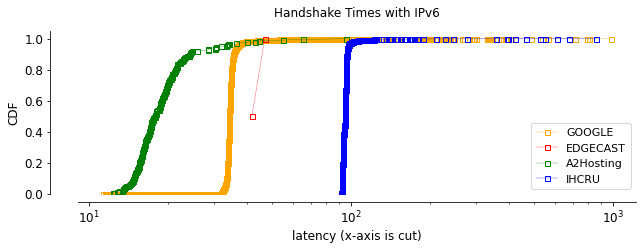

In [617]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15169
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#15133
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#55293
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#35415
#plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')
#203226
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
##ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['GOOGLE', 'EDGECAST', 'A2Hosting', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/handshake_times_IPv6_asno.png', format='png', bbox_inches='tight')

In [618]:
x = Cdf.MakeCdfFromList(quic15169['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic15133['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic55293['TTFB'].values)
x4 = Cdf.MakeCdfFromList(quic35415['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic203226['TTFB'].values)

In [619]:
print_percentiles(x1, 'quic15133')
print_percentiles(x3, 'quic55293')
print_percentiles(x4, 'quic35415')
print_percentiles(x5, 'quic203226')
print_percentiles(x, 'quic15169')

-----------------------------

percentile values distribution for quic15133

50th Percentile:40.552000

90th Percentile:446.241000

99th Percentile:906.793000

25th Percentile:33.741000

75th Percentile:159.919000

20th Percentile:40.552000

40th Percentile:446.241000

60th Percentile:906.793000

80th Percentile:33.741000

-----------------------------

-----------------------------

percentile values distribution for quic55293

50th Percentile:368.945000

90th Percentile:807.660000

99th Percentile:922.326000

25th Percentile:353.242000

75th Percentile:571.229000

20th Percentile:368.945000

40th Percentile:807.660000

60th Percentile:922.326000

80th Percentile:353.242000

-----------------------------

-----------------------------

percentile values distribution for quic35415

50th Percentile:101.469000

90th Percentile:520.892000

99th Percentile:878.143000

25th Percentile:92.028000

75th Percentile:270.230000

20th Percentile:101.469000

40th Percentile:520.892000

60th Percent

In [620]:
write_percentiles('quic15133.csv', x1)
write_percentiles('quic55293.csv', x3)
write_percentiles('quic35415.csv', x4)
write_percentiles('quic203226.csv', x5)
write_percentiles('quic15169.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


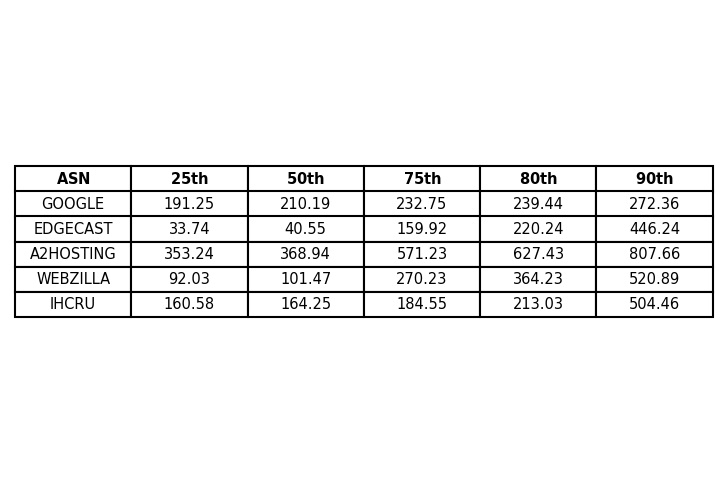

In [621]:
data = {'$\\bf{ASN}$': ['GOOGLE', 'EDGECAST', 'A2HOSTING', 'WEBZILLA', 'IHCRU'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x4.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x4.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x4.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x4.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x4.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/TTFB_ipv4_asno_percentile.png', format='png', bbox_inches='tight')

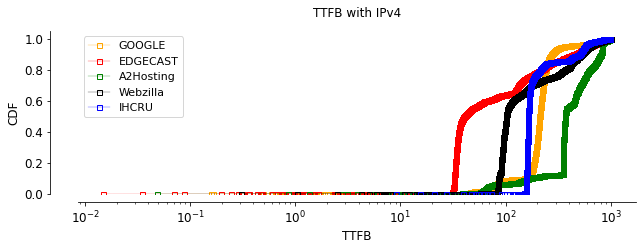

In [622]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15169
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#15133
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#55293
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#35415
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')
#203226
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['GOOGLE', 'EDGECAST', 'A2Hosting', 'Webzilla', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/TTFB_ipv4_asno.png', format='png', bbox_inches='tight')

In [623]:
x = Cdf.MakeCdfFromList(quic15169_6['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic15133_6['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic55293_6['TTFB'].values)
x4 = Cdf.MakeCdfFromList(quic35415_6['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic203226_6['TTFB'].values)

In [624]:
print_percentiles(x1, 'quic15133_6')
print_percentiles(x3, 'quic55293_6')
#print_percentiles(x4, 'quic35415_6')
print_percentiles(x5, 'quic203226_6')
print_percentiles(x, 'quic15169_6')

-----------------------------

percentile values distribution for quic15133_6

50th Percentile:302.998000

90th Percentile:765.412000

99th Percentile:765.412000

25th Percentile:302.998000

75th Percentile:765.412000

20th Percentile:302.998000

40th Percentile:765.412000

60th Percentile:765.412000

80th Percentile:302.998000

-----------------------------

-----------------------------

percentile values distribution for quic55293_6

50th Percentile:554.042000

90th Percentile:603.800000

99th Percentile:849.501000

25th Percentile:536.373000

75th Percentile:572.497000

20th Percentile:554.042000

40th Percentile:603.800000

60th Percentile:849.501000

80th Percentile:536.373000

-----------------------------

-----------------------------

percentile values distribution for quic203226_6

50th Percentile:142.293000

90th Percentile:489.980000

99th Percentile:757.607000

25th Percentile:139.174000

75th Percentile:155.378000

20th Percentile:142.293000

40th Percentile:489.980000



In [625]:
write_percentiles('quic15133_6.csv', x1)
write_percentiles('quic55293_6.csv', x3)
write_percentiles('quic35415_6.csv', x4)
write_percentiles('quic203226_6.csv', x5)
write_percentiles('quic15169_6.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


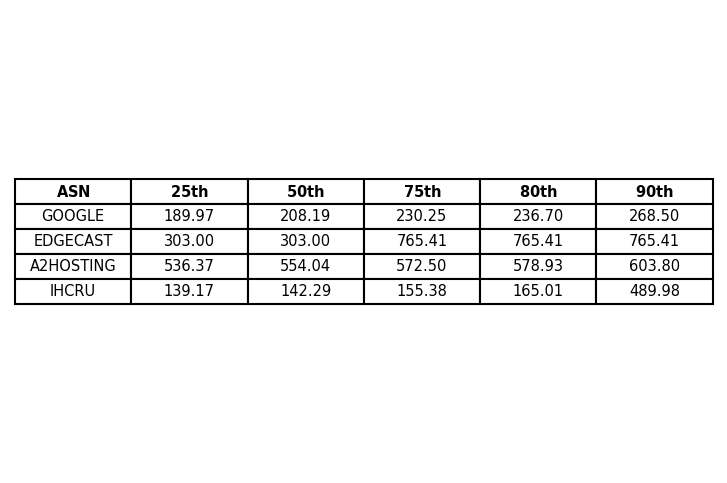

In [626]:
data = {'$\\bf{ASN}$': ['GOOGLE', 'EDGECAST', 'A2HOSTING', 'IHCRU'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)),  "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/TTFB_ipv6_asno_percentile.png', format='png', bbox_inches='tight')

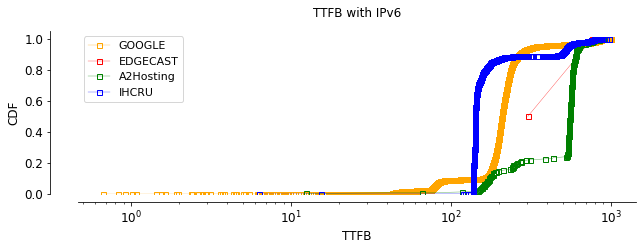

In [627]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15169
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#15133
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#55293
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#35415
#plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')
#203226
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['GOOGLE', 'EDGECAST', 'A2Hosting', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/TTFB_ipv6_asno.png', format='png', bbox_inches='tight')

In [628]:
x = Cdf.MakeCdfFromList(quic15169['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic15133['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic55293['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(quic35415['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic203226['TotalDownloadTime'].values)

In [629]:
print_percentiles(x1, 'quic15133')
print_percentiles(x3, 'quic55293')
print_percentiles(x4, 'quic35415')
print_percentiles(x5, 'quic203226')
print_percentiles(x, 'quic15169')

-----------------------------

percentile values distribution for quic15133

50th Percentile:58.496000

90th Percentile:477.866000

99th Percentile:930.928000

25th Percentile:36.529000

75th Percentile:179.922000

20th Percentile:58.496000

40th Percentile:477.866000

60th Percentile:930.928000

80th Percentile:36.529000

-----------------------------

-----------------------------

percentile values distribution for quic55293

50th Percentile:479.767000

90th Percentile:806.000000

99th Percentile:933.420000

25th Percentile:357.357000

75th Percentile:600.512000

20th Percentile:479.767000

40th Percentile:806.000000

60th Percentile:933.420000

80th Percentile:357.357000

-----------------------------

-----------------------------

percentile values distribution for quic35415

50th Percentile:102.783000

90th Percentile:521.144000

99th Percentile:877.919000

25th Percentile:92.344000

75th Percentile:273.475000

20th Percentile:102.783000

40th Percentile:521.144000

60th Percent

In [630]:
write_percentiles('quic15133.csv', x1)
write_percentiles('quic55293.csv', x3)
write_percentiles('quic35415.csv', x4)
write_percentiles('quic203226.csv', x5)
write_percentiles('quic15169.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


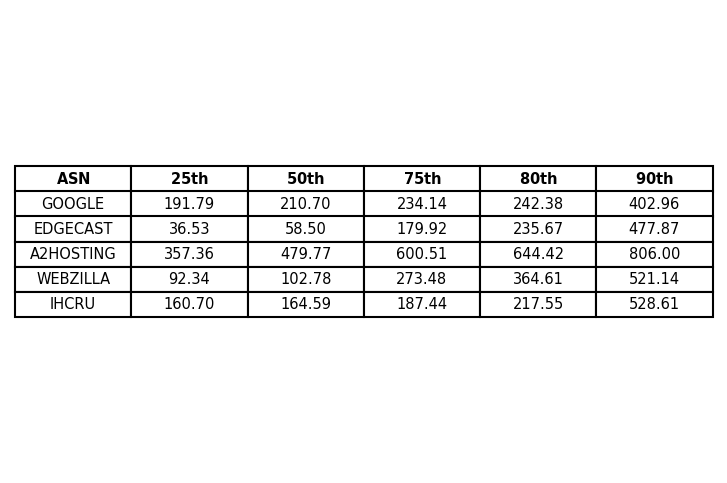

In [631]:
data = {'$\\bf{ASN}$': ['GOOGLE', 'EDGECAST', 'A2HOSTING', 'WEBZILLA', 'IHCRU'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x4.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x4.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x4.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x4.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x4.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/TotalDownloadTime_ipv4_asno_percentile.png', format='png', bbox_inches='tight')

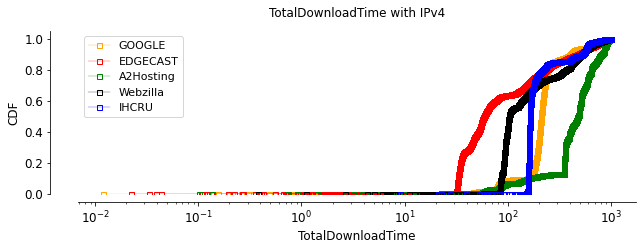

In [632]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15169
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#15133
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#55293
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#35415
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')
#203226
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['GOOGLE', 'EDGECAST', 'A2Hosting', 'Webzilla', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/TotalDownloadTime_ipv4_asno.png', format='png', bbox_inches='tight')

In [633]:
x = Cdf.MakeCdfFromList(quic15169_6['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic15133_6['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic55293_6['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(quic35415_6['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic203226_6['TotalDownloadTime'].values)

In [634]:
write_percentiles('quic15133_6.csv', x1)
write_percentiles('quic55293_6.csv', x3)
#write_percentiles('quic35415_6.csv', x4)
write_percentiles('quic203226_6.csv', x5)
write_percentiles('quic15169_6.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


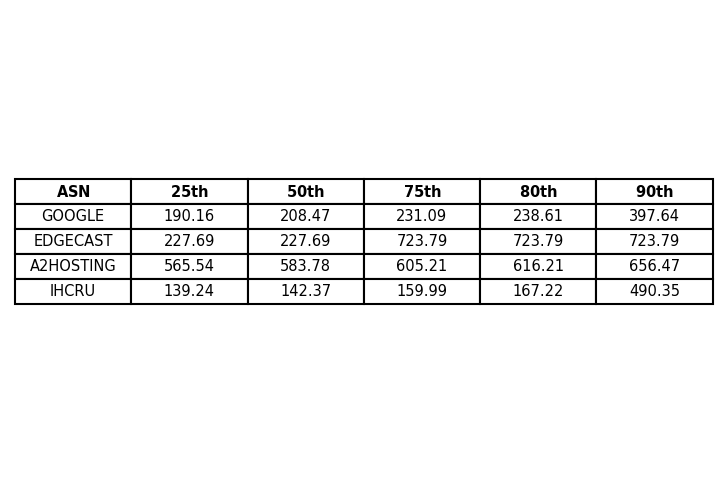

In [635]:
data = {'$\\bf{ASN}$': ['GOOGLE', 'EDGECAST', 'A2HOSTING', 'IHCRU'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/TotalDownloadTime_ipv6_asno_percentile.png', format='png', bbox_inches='tight')

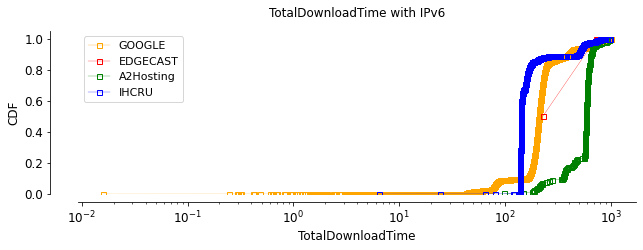

In [636]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#15169
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#15133
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#55293
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#35415
#plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')
#203226
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['GOOGLE', 'EDGECAST', 'A2Hosting', 'IHCRU'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/TotalDownloadTime_ipv6_asno.png', format='png', bbox_inches='tight')

In [637]:
#GOOGLE



quic46 = quic15169.loc[t['Protocol'] == 'Q046']
quic43 = quic15169.loc[t['Protocol'] == 'Q043']
quic50 = quic15169.loc[t['Protocol'] == 'Q050']
quich24 = quic15169.loc[t['Protocol'] == 'FF000018']

In [638]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['ConnectionEstablishmentTime'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


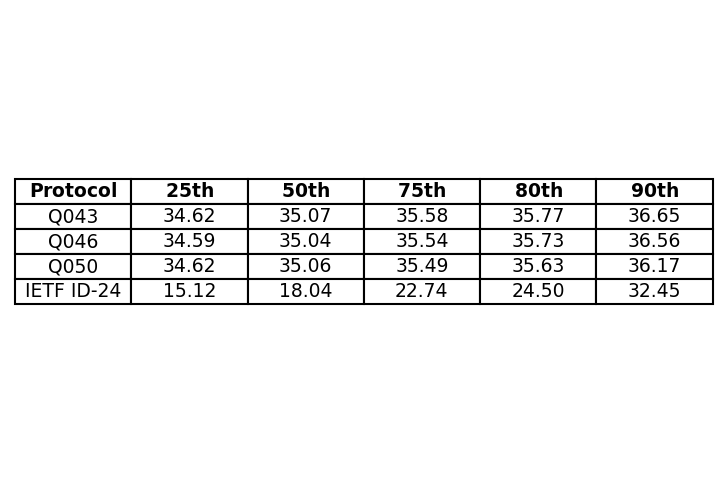

In [639]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/handshake_times_ipv4_asn15169_percentile.png', format='png', bbox_inches='tight')

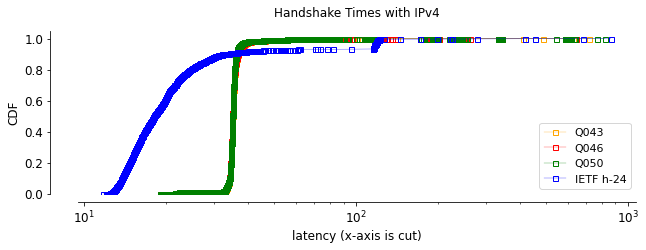

In [640]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Qh24
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF h-24'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/handshake_times_ipv4_asn15169.png', format='png', bbox_inches='tight')


In [641]:
#GOOGLE



quic46_6 = quic15169_6.loc[t['Protocol'] == 'Q046']
quic43_6 = quic15169_6.loc[t['Protocol'] == 'Q043']
quic50_6 = quic15169_6.loc[t['Protocol'] == 'Q050']
quich24_6 = quic15169_6.loc[t['Protocol'] == 'FF000018']

In [642]:
x = Cdf.MakeCdfFromList(quic43_6['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic46_6['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50_6['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quich24_6['ConnectionEstablishmentTime'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


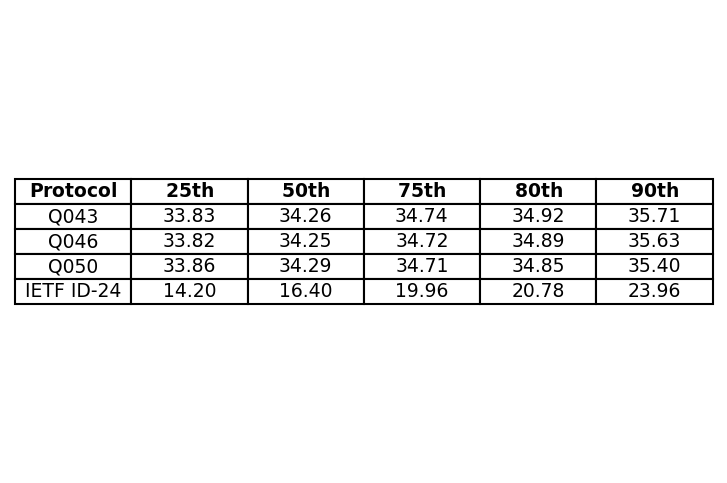

In [643]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/handshake_times_ipv6_asn15169_percentile.png', format='png', bbox_inches='tight')

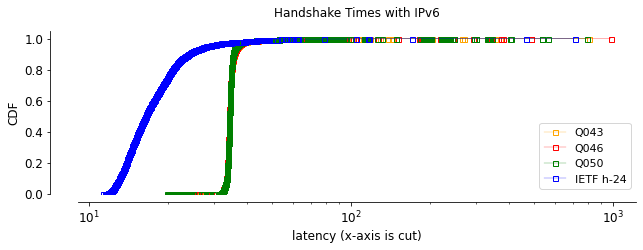

In [644]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Qh24
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF h-24'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/handshake_times_ipv6_asn15169.png', format='png', bbox_inches='tight')

In [645]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quich24['TTFB'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


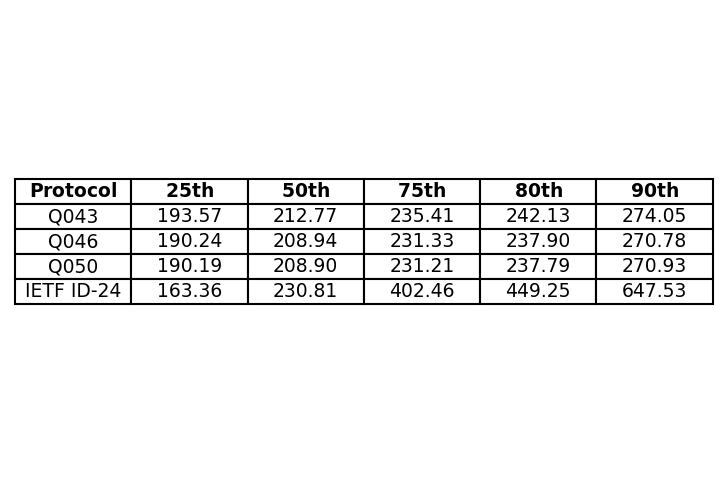

In [646]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/TTFB_ipv4_asn15169_percentile.png', format='png', bbox_inches='tight')


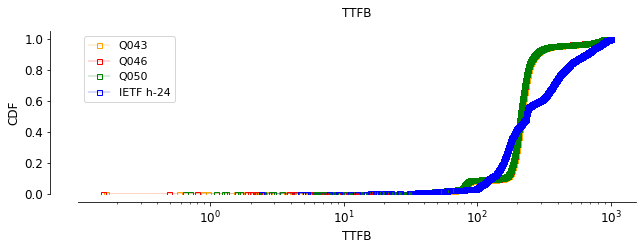

In [647]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF h-24'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/TTFB_ipv4_asn15169.png', format='png', bbox_inches='tight')


In [648]:
x = Cdf.MakeCdfFromList(quic43_6['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46_6['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50_6['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quich24_6['TTFB'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


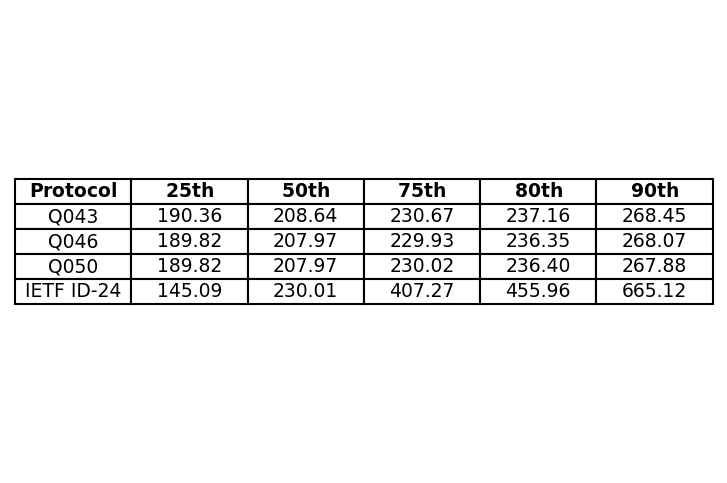

In [649]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/TTFB_ipv6_asn15169_percentile.png', format='png', bbox_inches='tight')

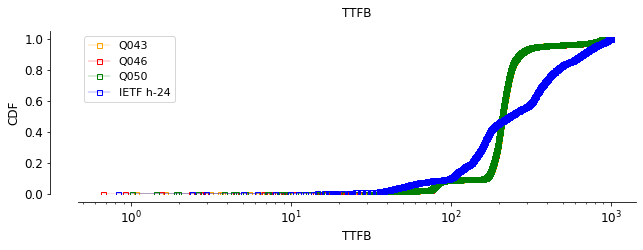

In [650]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF h-24'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/TTFB_ipv6_asn15169.png', format='png', bbox_inches='tight')

In [651]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['TotalDownloadTime'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


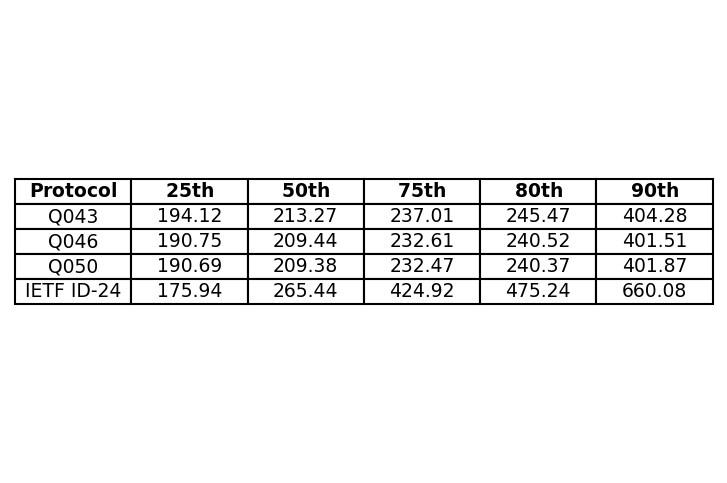

In [652]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/total_download_time_ipv4_asn15169_percentile.png', format='png', bbox_inches='tight')

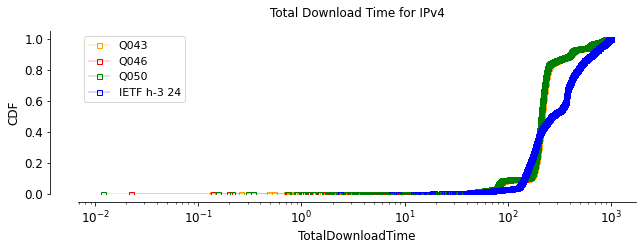

In [653]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF h-3 24'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Total Download Time for IPv4', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/total_download_time_ipv4_asn15169.png', format='png', bbox_inches='tight')


In [654]:
x = Cdf.MakeCdfFromList(quic43_6['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46_6['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50_6['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quich24_6['TotalDownloadTime'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


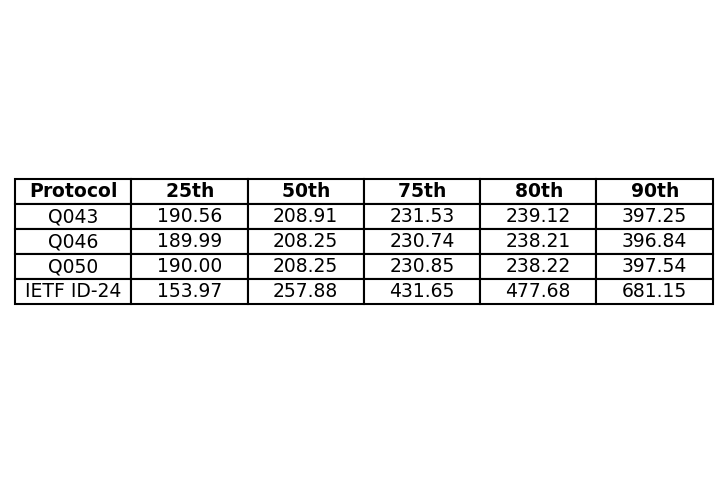

In [655]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/total_download_time_ipv6_asn15169_percentile.png', format='png', bbox_inches='tight')

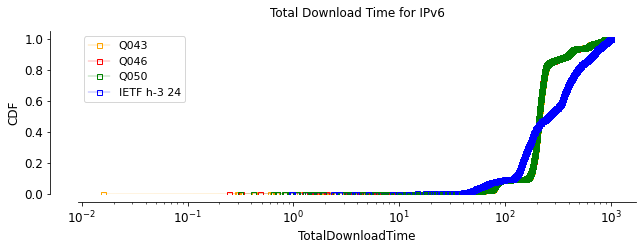

In [656]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF h-3 24'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Total Download Time for IPv6', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/total_download_time_ipv6_asn15169.png', format='png', bbox_inches='tight')

In [657]:
#Edgecast


quic44 = quic15133.loc[t['Protocol'] == 'Q046']
quic43 = quic15133.loc[t['Protocol'] == 'Q043']
quic39 = quic15133.loc[t['Protocol'] == 'Q050']
quic35 = quic15133.loc[t['Protocol'] == 'FF000018']

quic44_6 = quic15133_6.loc[t['Protocol'] == 'Q046']
quic43_6 = quic15133_6.loc[t['Protocol'] == 'Q043']
quic39_6 = quic15133_6.loc[t['Protocol'] == 'Q050']
quic35_6 = quic15133_6.loc[t['Protocol'] == 'FF000018']

In [658]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['ConnectionEstablishmentTime'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


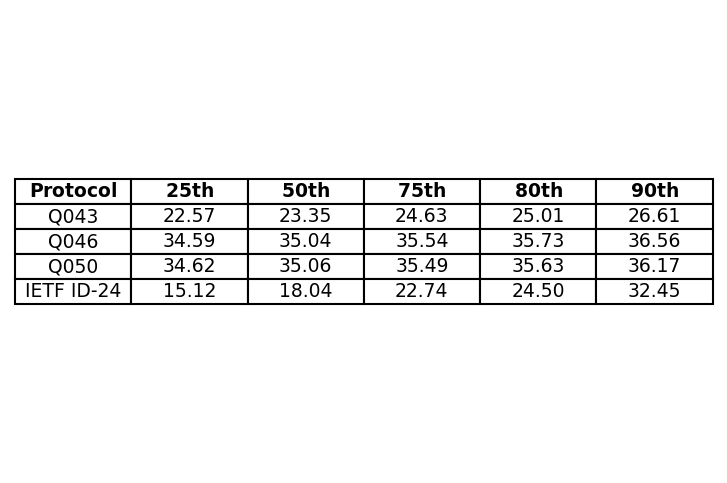

In [659]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/handshake_times_ipv4_asn15133_percentile.png', format='png', bbox_inches='tight')

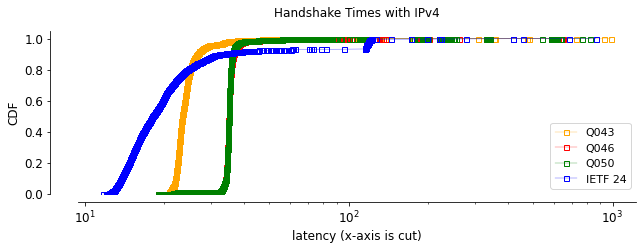

In [660]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF 24'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/handshake_times_ipv4_asn15133.png', format='png', bbox_inches='tight')


In [661]:
x = Cdf.MakeCdfFromList(quic43_6['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic46_6['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50_6['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quich24_6['ConnectionEstablishmentTime'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


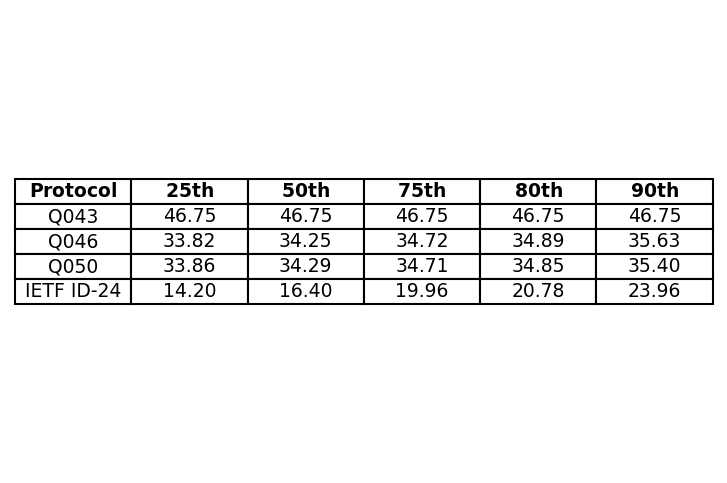

In [662]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/handshake_times_ipv6_asn15133_percentile.png', format='png', bbox_inches='tight')

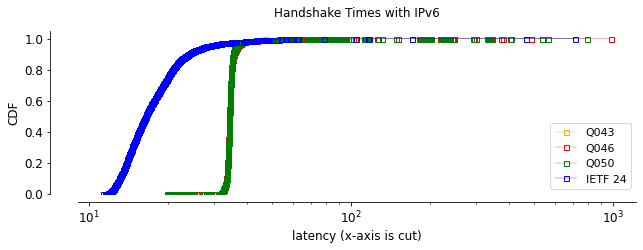

In [663]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF 24'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/handshake_times_ipv6_asn15133.png', format='png', bbox_inches='tight')


In [664]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quich24['TTFB'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


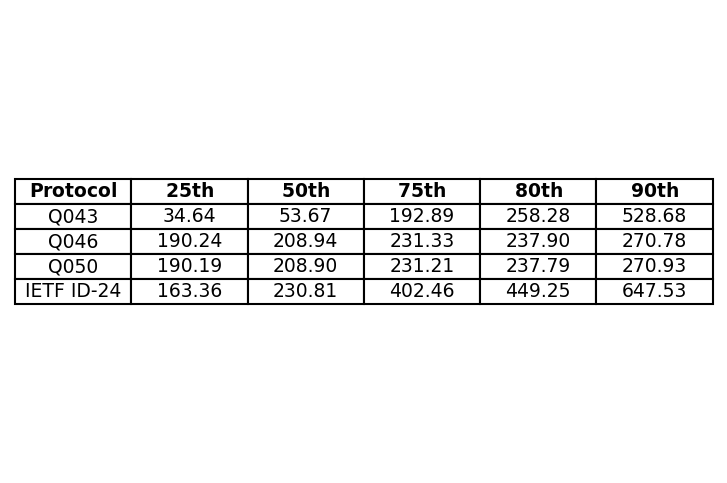

In [665]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/TTFB_ipv4_asn15133_percentile.png', format='png', bbox_inches='tight')


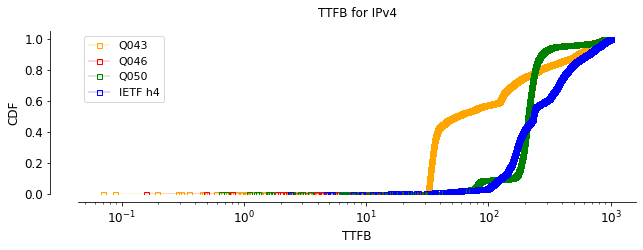

In [666]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h4
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF h4'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB for IPv4', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/TTFB_ipv4_asn15133.png', format='png', bbox_inches='tight')


In [667]:
x = Cdf.MakeCdfFromList(quic43_6['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46_6['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50_6['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quich24_6['TTFB'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


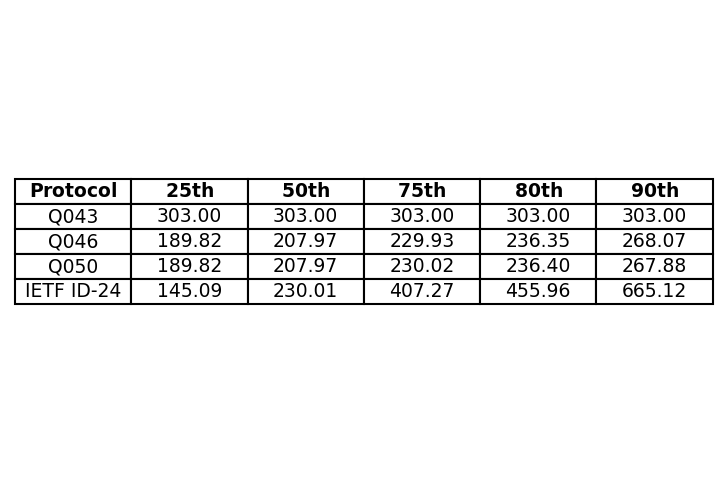

In [668]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/TTFB_ipv6_asn15133_percentile.png', format='png', bbox_inches='tight')


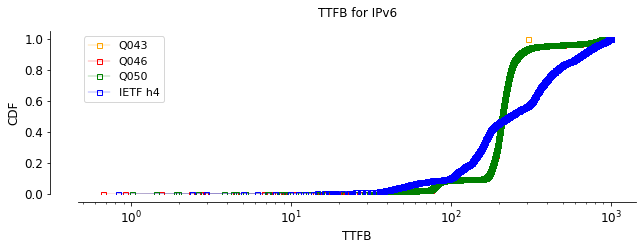

In [669]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h4
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF h4'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB for IPv6', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/TTFB_ipv6_asn15133.png', format='png', bbox_inches='tight')


In [670]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['TotalDownloadTime'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


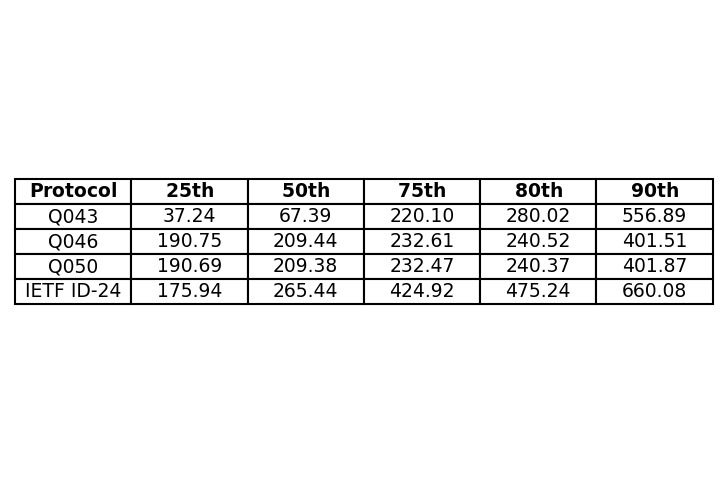

In [671]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/Total_Download_time_ipv4_asn15133_percentile.png', format='png', bbox_inches='tight')


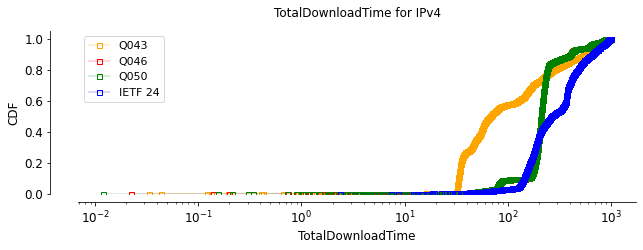

In [672]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF 24'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime for IPv4', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/Total_Download_time_ipv4_asn15133.png', format='png', bbox_inches='tight')



In [673]:
x = Cdf.MakeCdfFromList(quic43_6['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46_6['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50_6['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quich24_6['TotalDownloadTime'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


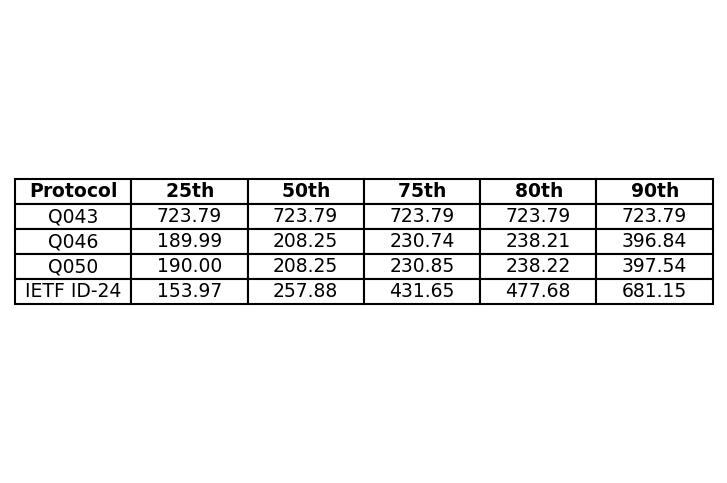

In [674]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x5.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x5.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x5.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x5.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x5.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/Total_Download_time_ipv6_asn15133_percentile.png', format='png', bbox_inches='tight')

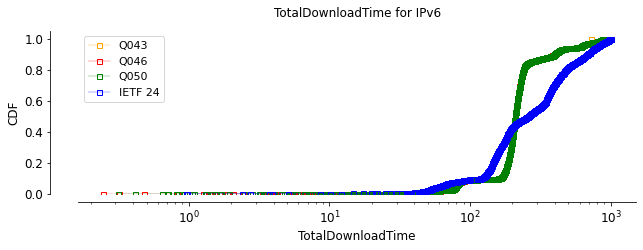

In [675]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF 24'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime for IPv6', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/Total_Download_time_ipv6_asn15133.png', format='png', bbox_inches='tight')

In [676]:
# IHCRU - Internet-Hosting Ltd


quic203226 = quic4.loc[t['ASNo'] == 203226]
quic203226_6 = quic6.loc[t['ASNo'] == 203226]
quic46 = quic203226.loc[t['Protocol'] == 'Q046']
quic43 = quic203226.loc[t['Protocol'] == 'Q043']
quic50 = quic203226.loc[t['Protocol'] == 'Q050']
quich24 = quic203226.loc[t['Protocol'] == 'FF000018']

quic46_6 = quic203226_6.loc[t['Protocol'] == 'Q046']
quic43_6 = quic203226_6.loc[t['Protocol'] == 'Q043']
quic50_6 = quic203226_6.loc[t['Protocol'] == 'Q050']
quich24_6 = quic203226_6.loc[t['Protocol'] == 'FF000018']

In [677]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['ConnectionEstablishmentTime'].values)

print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


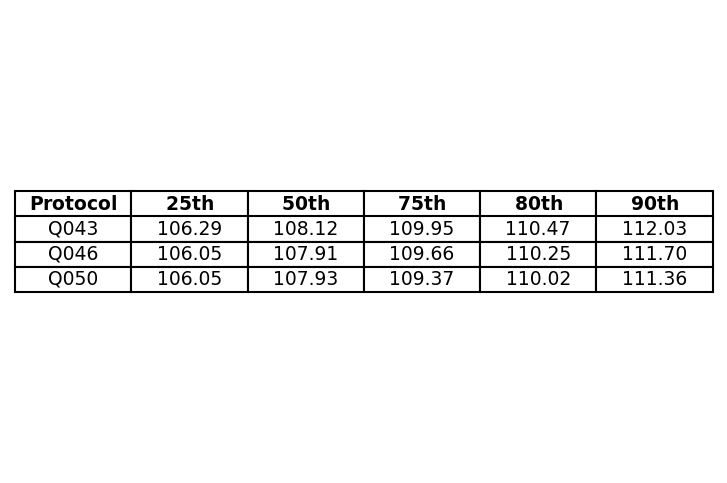

In [678]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/handshake_times_ipv4_asn203226_percentile.png', format='png', bbox_inches='tight')

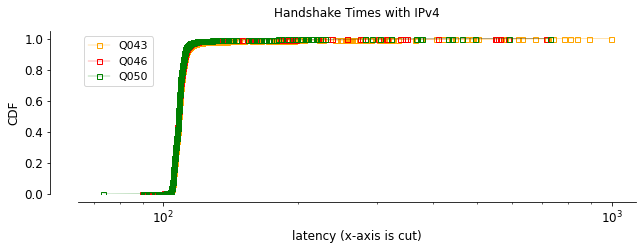

In [679]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/handshake_times_ipv4_asn203226.png', format='png', bbox_inches='tight')


In [680]:
x = Cdf.MakeCdfFromList(quic43_6['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic46_6['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50_6['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quich24_6['ConnectionEstablishmentTime'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


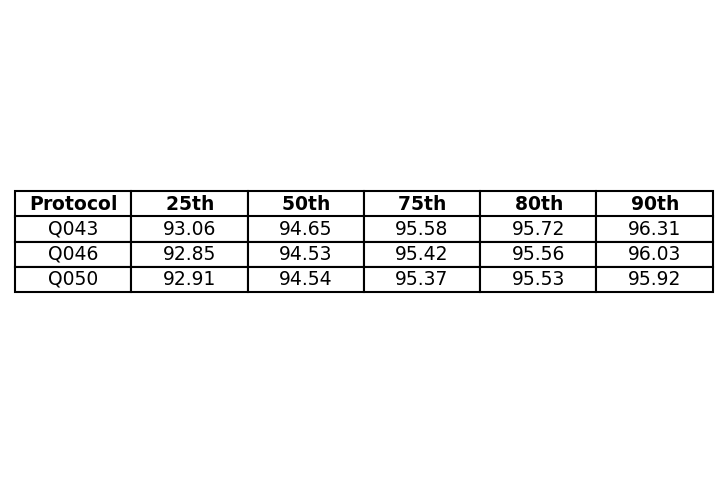

In [681]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/handshake_times_ipv6_asn203226_percentile.png', format='png', bbox_inches='tight')

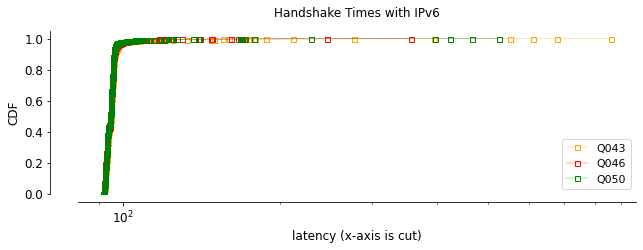

In [682]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/handshake_times_ipv6_asn203226.png', format='png', bbox_inches='tight')

In [683]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quich24['TTFB'].values)

In [684]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:163.563000

90th Percentile:458.421000

99th Percentile:748.911000

25th Percentile:160.397000

75th Percentile:178.763000

20th Percentile:163.563000

40th Percentile:458.421000

60th Percentile:748.911000

80th Percentile:160.397000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:163.548000

90th Percentile:458.166000

99th Percentile:749.548000

25th Percentile:160.526000

75th Percentile:177.604000

20th Percentile:163.548000

40th Percentile:458.166000

60th Percentile:749.548000

80th Percentile:160.526000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:165.574000

90th Percentile:537.058000

99th Percentile:857.551000

25th Percentile:160.875000

75th Percentile:207.835000

20th Percentile:165.574000

40th Percentile:537.058000

60th Percentile:857.55

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


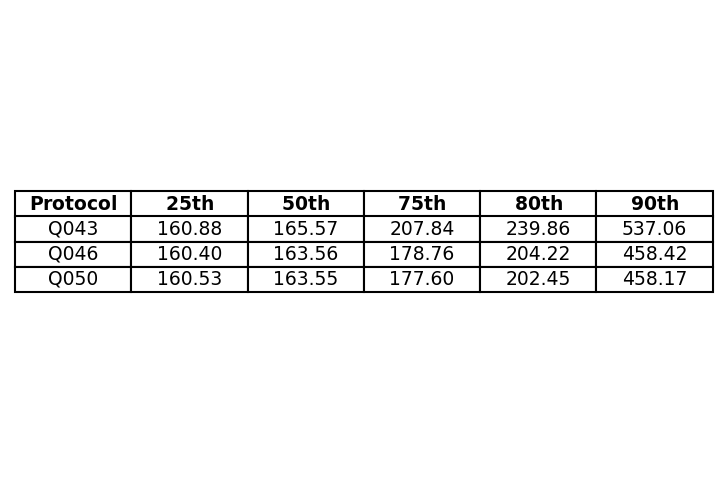

In [685]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/ttfb_ipv4_asn203226_percentile.png', format='png', bbox_inches='tight')

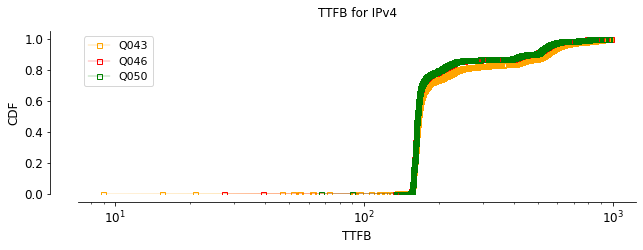

In [686]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q=h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB for IPv4', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/ttfb_ipv4_asn203226.png', format='png', bbox_inches='tight')


In [687]:
x = Cdf.MakeCdfFromList(quic43_6['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46_6['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50_6['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quich24_6['TTFB'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


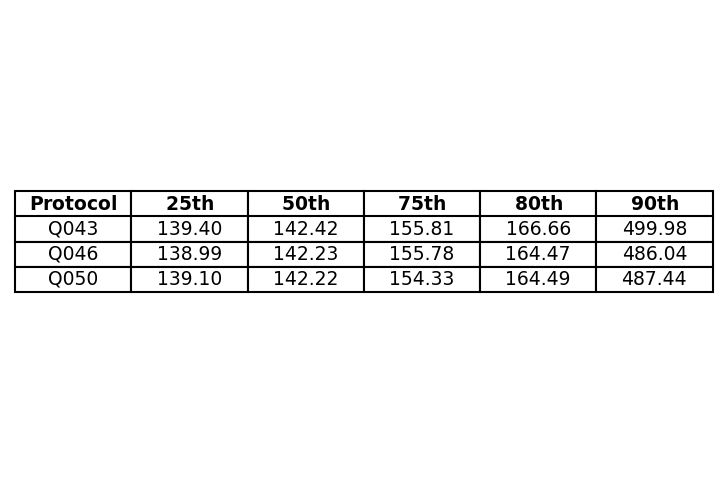

In [688]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/ttfb_ipv6_asn203226_percentile.png', format='png', bbox_inches='tight')

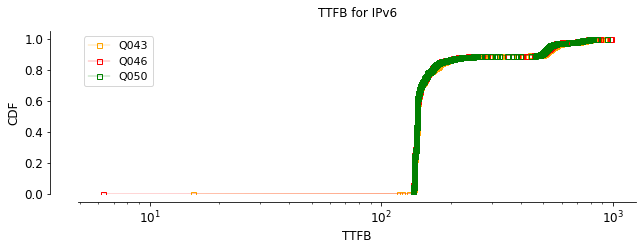

In [689]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q=h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB for IPv6', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/ttfb_ipv6_asn203226.png', format='png', bbox_inches='tight')

In [690]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quich24['TotalDownloadTime'].values)

In [691]:
print_percentiles(x1, 'Q046')
print_percentiles(x3, 'Q050')
#print_percentiles(x5, 'h24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q046

50th Percentile:163.900000

90th Percentile:458.494000

99th Percentile:754.417000

25th Percentile:160.539000

75th Percentile:182.710000

20th Percentile:163.900000

40th Percentile:458.494000

60th Percentile:754.417000

80th Percentile:160.539000

-----------------------------

-----------------------------

percentile values distribution for Q050

50th Percentile:163.930000

90th Percentile:458.226000

99th Percentile:752.895000

25th Percentile:160.643000

75th Percentile:183.219000

20th Percentile:163.930000

40th Percentile:458.226000

60th Percentile:752.895000

80th Percentile:160.643000

-----------------------------

-----------------------------

percentile values distribution for Q043

50th Percentile:165.789000

90th Percentile:565.813000

99th Percentile:864.376000

25th Percentile:161.003000

75th Percentile:208.518000

20th Percentile:165.789000

40th Percentile:565.813000

60th Percentile:864.37

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


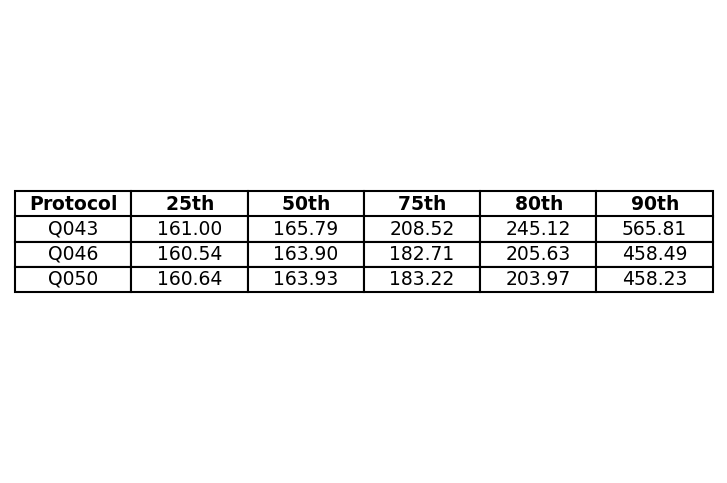

In [692]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/totaldownloadtime_ipv4_asn203226_percentile.png', format='png', bbox_inches='tight')


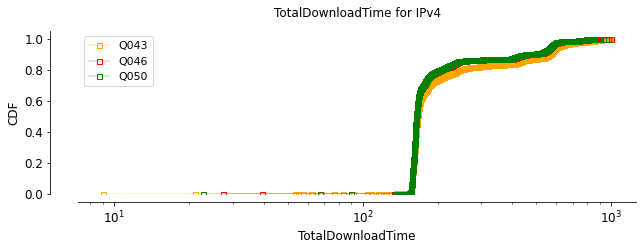

In [693]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime for IPv4', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/totaldownloadtime_ipv4_asn203226.png', format='png', bbox_inches='tight')


In [694]:
x = Cdf.MakeCdfFromList(quic43_6['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46_6['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50_6['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quich24_6['TotalDownloadTime'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


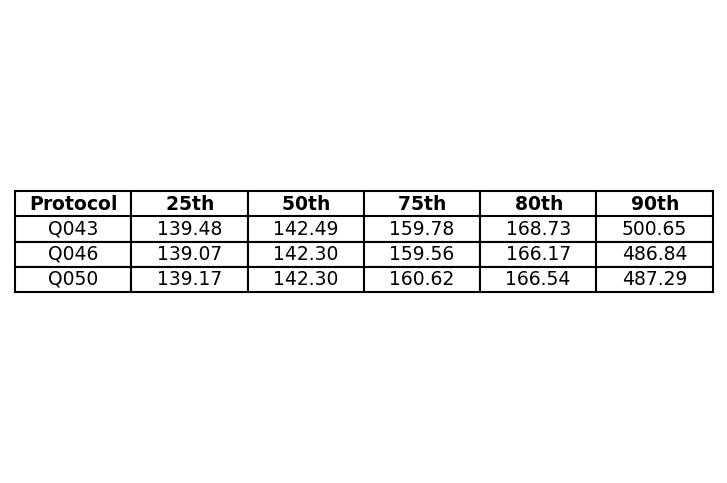

In [695]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x3.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x3.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x3.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x3.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x3.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots(dpi=150)

 #hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

#fig.tight_layout()
plt.savefig('./plots2020/ASN/totaldownloadtime_ipv6_asn203226_percentile.png', format='png', bbox_inches='tight')


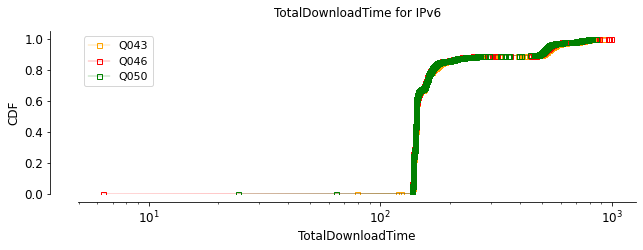

In [696]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#h24
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')



ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,600])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime for IPv6', fontsize=12, y=1.05)
plt.savefig('./plots2020/ASN/totaldownloadtime_ipv6_asn203226.png', format='png', bbox_inches='tight')
